<a href="https://colab.research.google.com/github/naotoo1/MD/blob/main/ImageMalariaProto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Portotorch

In [ ]:
!pip install prototorch

In [ ]:
!pip install prototorch.models

In [ ]:
!pip install pytorch_lightning

Inport libraries

In [4]:
import prototorch as pt
import pytorch_lightning as pl
import torch
from torchvision import transforms
from torchvision.utils import make_grid
from matplotlib import pyplot as plt

Load the data set

In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
train_path = "/drive/My Drive/malaria_images/Train"
test_path = "/drive/My Drive/malaria_images/Test"

Mounted at /content/drive


In [6]:
import numpy as np
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.transforms.transforms import Resize

Create preprocessing transformation for the train data set

In [7]:
transform=transforms.Compose([
        transforms.Resize([64, 64]),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        ])

Transform the train data set

In [8]:
train_ds = datasets.ImageFolder(
    root= '/content/drive/My Drive/malaria_images/Train', transform=transform)

Tranform the test data set

In [9]:
test_ds = datasets.ImageFolder(
    root= '/content/drive/My Drive/malaria_images/Test', 
    transform=transforms.Compose([
        transforms.Resize([64, 64]),
        transforms.ToTensor(),
        ])
    )

Get the class labels

In [10]:
print(train_ds.class_to_idx)

{'Parasite': 0, 'Uninfected': 1}


In [11]:
print(test_ds.class_to_idx)

{'Parasite': 0, 'Uninfected': 1}


Get prototypes from the feature space

In [12]:
s = int(0.05 * len(train_ds))
init_ds, rest_ds = torch.utils.data.random_split(train_ds, [s, len(train_ds) - s])

Get train and validation set

In [13]:
s1 = int(0.75 * len(train_ds))
train_ds1, val_ds = torch.utils.data.random_split(train_ds, [s1, len(train_ds) - s1])

Set the dataloader for train and validation set

In [14]:
dataloaders = torch.utils.data.DataLoader(
    train_ds1, batch_size=32, shuffle=True)
valloaders = torch.utils.data.DataLoader(
    val_ds, batch_size=32, shuffle=False)

Create the imageGMLVQ model

In [15]:
model = pt.models.glvq.ImageGMLVQ(
    dict(input_dim=12288,
         latent_dim=12288,
         distribution=(2, 1),
         proto_lr=0.0001,
         bb_lr=0.0001),
    optimizer=torch.optim.Adam,
    prototypes_initializer=pt.initializers.SMCI(init_ds),
)

Summary of the imageGMLVQ model

In [16]:
print(model)

ProtoTorch Bolt(
	ImageGMLVQ(
	  (omega): (shape: (12288, 12288))
	  (distance_layer): LambdaLayer(omega_distance)
	  (proto_layer): LabeledComponents(components: (shape: (2, 3, 64, 64)))
	  (competition_layer): WTAC()
	  (loss): GLVQLoss()
	  (backbone): LambdaLayer(omega matrix)
	)
)


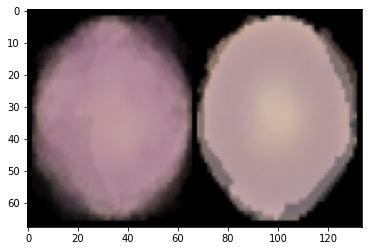

In [ ]:
plt.imshow(model.get_prototype_grid(num_columns=5),aspect='auto')

Set-up the trainer 

In [ ]:
trainer = pl.Trainer(max_epochs=50,
                     enable_model_summary=False,
                     accelerator='gpu',
                     devices=1)

Fit the trainer with the imageGMLVQ model to the train and validation set

In [ ]:
trainer.fit(model, train_dataloaders=dataloaders, val_dataloaders=valloaders)

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1937: PossibleUserWarning: The number of training batches (10) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Summary of prototype labels

In [ ]:
model.prototype_labels

tensor([0, 1])

Visualize the learned prototypes from the imageGMLVQ

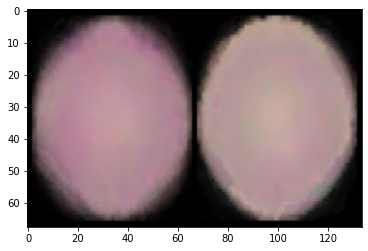

In [ ]:
plt.imshow(model.get_prototype_grid(num_columns=5),aspect='auto')

Save the checkpoints of the imageGMLVQ model 

In [ ]:
ckpt_path = "/content/drive/MyDrive/checkpoints/imagegmlvq112.ckpt"
trainer.save_checkpoint(ckpt_path)

Save the trained model

In [ ]:
ckpt_path = "/content/drive/MyDrive/checkpoints/imagegmlvq112.pth"
torch.save(model.state_dict(), ckpt_path)

In [16]:
ckpt_path = "/content/drive/MyDrive/checkpoints/imagegmlvq112.pth"

Load trained model

In [ ]:
trained_model = pt.models.glvq.ImageGMLVQ.load_from_checkpoint(
    "/content/drive/MyDrive/checkpoints/imagegmlvq112.ckpt", 
    strict=False)

Create the model with same initialisation as before

In [18]:
model1 = pt.models.glvq.ImageGMLVQ(
    dict(input_dim=12288,
         latent_dim=12288,
         distribution=(2, 1),
         proto_lr=0.0001,
         bb_lr=0.0001),
    optimizer=torch.optim.Adam,
    prototypes_initializer=pt.initializers.LCI(trained_model.prototypes),
    labels_initializer=pt.initializers.LLI(trained_model.prototype_labels),
)

Load the saved model

In [19]:
ckpt_path = "/content/drive/MyDrive/checkpoints/imagegmlvq112.pth"
torch.load(ckpt_path)

OrderedDict([('_omega',
              tensor([[ 1.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
                      [ 0.0000,  1.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
                      [ 0.0000,  0.0000,  1.0000,  ...,  0.0000,  0.0000,  0.0000],
                      ...,
                      [ 0.0000,  0.0000,  0.0000,  ...,  0.9627, -0.0297,  0.0000],
                      [ 0.0000,  0.0000,  0.0000,  ..., -0.0049,  1.0053,  0.0000],
                      [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  1.0000]])),
             ('prototype_win_ratios', tensor([[0.0000, 0.0000],
                      [0.5938, 0.4062],
                      [0.5312, 0.4688],
                      [0.5625, 0.4375],
                      [0.5938, 0.4062],
                      [0.6250, 0.3750],
                      [0.5625, 0.4375],
                      [0.5312, 0.4688],
                      [0.5312, 0.4688],
                      [0.5625, 0.4375],
                  

Load state_dict

In [21]:
model1.load_state_dict(torch.load(ckpt_path), strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['prototype_win_ratios'])

Visualize the trained prototypes

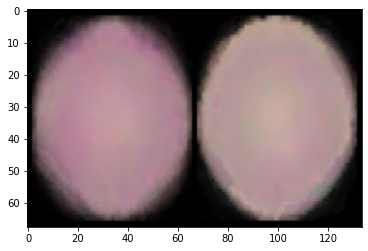

In [22]:
plt.imshow(model1.get_prototype_grid(num_columns=5),aspect='auto')

In [20]:
from PIL import Image 

Preprocessing transformations for test images

In [21]:
transform=transforms.Compose([
        transforms.Resize([64, 64]),
        transforms.ToTensor(),
        ])

Get some test images

In [22]:
imgp1 = Image.open('/content/C39P4thinF_original_IMG_20150622_105554_cell_10.png')
imgp2 = Image.open('/content/C39P4thinF_original_IMG_20150622_105554_cell_11.png')


In [23]:
imgu1 = Image.open('/content/C3thin_original_IMG_20150608_163029_cell_52.png')
imgu2 = Image.open('/content/C3thin_original_IMG_20150608_162922_cell_217.png')


Transform the test images

In [38]:
parasites = transform(imgp2)
uninfected = transform(imgu2)


Unsqueeze batch dimensions

In [39]:
parasites_ = parasites.unsqueeze(0) 
uninfected_ = uninfected.unsqueeze(0)

Get predictions

In [ ]:
prediction_p = model1.predict(parasites_) 
prediction_u = model1.predict(uninfected_) 


Get predictions with confidence/Recall *procedure*

In [41]:
with torch.no_grad():
  if int(prediction_u)==1:
    print(f'Uninfected with {(model1(uninfected_))[0][1]*100} % confidence')
  else:
    print(f'Infected with {(model1(uninfected_))[0][0]*100} % confidence')


Uninfected with 100.0 % confidence
